# ATL LLM Judge Summary
Summary file: summary__judge-gpt-5.2.json


In [19]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Resolve summary path from common locations
summary_rel = Path("summary__judge-gpt-5.2.json")
candidates = [Path.cwd() / summary_rel]
for parent in Path.cwd().parents:
    candidates.append(parent / summary_rel)
candidates.append(Path(__file__).resolve().parent / summary_rel if '__file__' in globals() else None)
candidates = [c for c in candidates if c is not None]

summary_path = next((c for c in candidates if c.exists()), None)
if summary_path is None:
    raise FileNotFoundError(
        'Could not find summary__judge-*.json. Run run_llm_judge.py first.'
    )

summary = json.loads(summary_path.read_text(encoding='utf-8'))
per_file = summary['per_file']
df = pd.DataFrame([
    {
        'source_file': item['source_file'],
        'accuracy': item['metrics']['accuracy'],
        'f1': item['metrics']['f1'],
        'evaluated': item['metrics']['evaluated'],
        'tp': item['metrics']['tp'],
        'fp': item['metrics']['fp'],
        'fn': item['metrics']['fn'],
        'tn': item['metrics']['tn'],
    }
    for item in per_file
])
df


,source_file,accuracy,f1,evaluated,tp,fp,fn,tn
0,ds-r1-qwen-32b_baseline_few_shot.json,0.70,0.70,20,14,6,6,0
1,ds-r1-qwen-32b_baseline_zero_shot.json,0.10,0.10,20,2,18,18,0
2,ds-v3.2_baseline_few_shot.json,0.70,0.70,20,14,6,6,0
3,ds-v3.2_baseline_zero_shot.json,0.60,0.60,20,12,8,8,0
4,gemma3-27b_baseline_few_shot.json,0.65,0.65,20,13,7,7,0
5,gemma3-27b_baseline_zero_shot.json,0.10,0.10,20,2,18,18,0
6,gpt-4.1_baseline_few_shot.json,0.85,0.85,20,17,3,3,0
7,gpt-4.1_baseline_zero_shot.json,0.80,0.80,20,16,4,4,0
8,gpt-5.2_baseline_few_shot.json,0.80,0.80,20,16,4,4,0
9,gpt-5.2_baseline_zero_shot.json,0.80,0.80,20,16,4,4,0


In [20]:
# Leaderboard table
leaderboard = df.sort_values(['accuracy', 'f1'], ascending=[False, False])
leaderboard[['source_file', 'accuracy', 'f1', 'evaluated']]


,source_file,accuracy,f1,evaluated
10,gpt-5_baseline_few_shot.json,0.95,0.95,20
30,qwen-7b_finetuned_few_shot.json,0.95,0.95,20
14,llama_finetuned_few_shot.json,0.90,0.90,20
19,mistral_finetuned_zero_shot.json,0.90,0.90,20
6,gpt-4.1_baseline_few_shot.json,0.85,0.85,20
15,llama_finetuned_zero_shot.json,0.85,0.85,20
18,mistral_finetuned_few_shot.json,0.85,0.85,20
7,gpt-4.1_baseline_zero_shot.json,0.80,0.80,20
8,gpt-5.2_baseline_few_shot.json,0.80,0.80,20
9,gpt-5.2_baseline_zero_shot.json,0.80,0.80,20


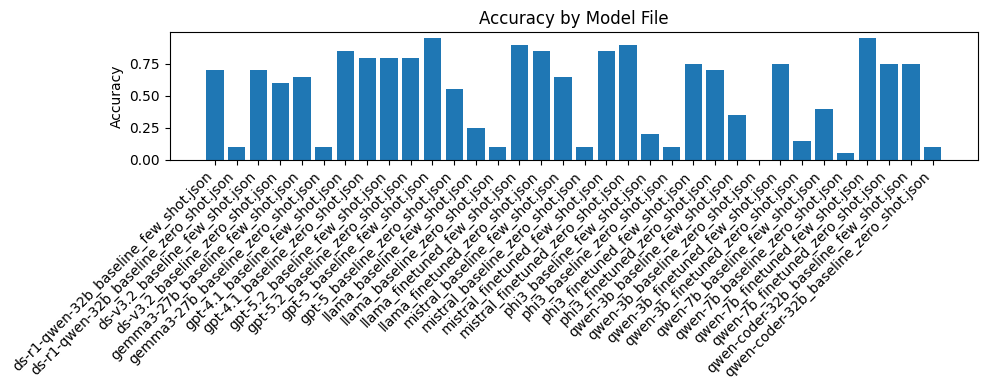

In [21]:
# Accuracy by model file
plt.figure(figsize=(10, 4))
plt.bar(df['source_file'], df['accuracy'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy by Model File')
plt.tight_layout()
plt.show()


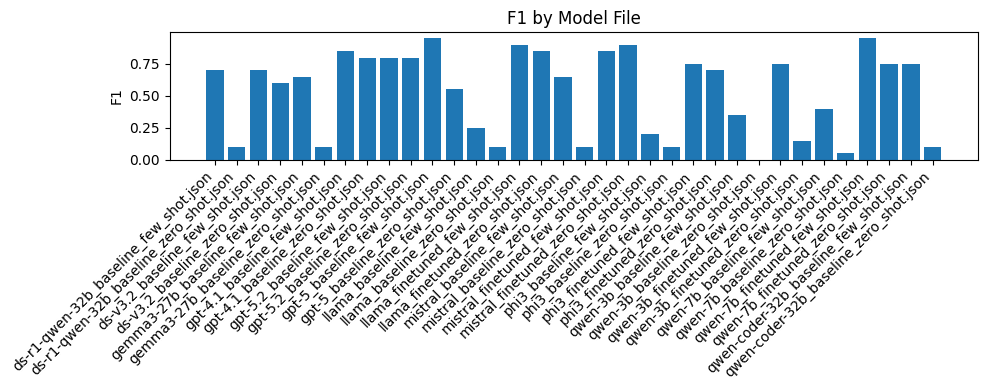

In [22]:
# F1 by model file
plt.figure(figsize=(10, 4))
plt.bar(df['source_file'], df['f1'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1')
plt.title('F1 by Model File')
plt.tight_layout()
plt.show()


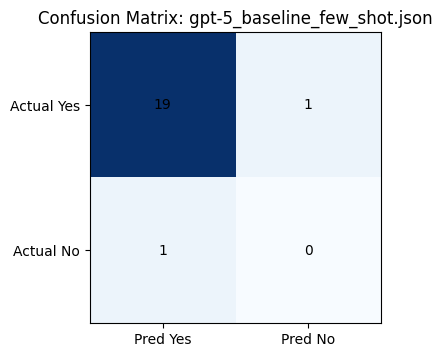

In [23]:
# Confusion matrix heatmap for best model
best = summary['ranking'][0]['source_file'] if summary['ranking'] else None
if best is not None:
    best_row = df[df['source_file'] == best].iloc[0]
    cm = np.array([[best_row['tp'], best_row['fp']], [best_row['fn'], best_row['tn']]])
    plt.figure(figsize=(4, 4))
    plt.imshow(cm, cmap='Blues')
    plt.title(f'Confusion Matrix: {best}')
    plt.xticks([0, 1], ['Pred Yes', 'Pred No'])
    plt.yticks([0, 1], ['Actual Yes', 'Actual No'])
    for (i, j), val in np.ndenumerate(cm):
        plt.text(j, i, int(val), ha='center', va='center')
    plt.tight_layout()
    plt.show()
